In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('Data/ALL_PCR_MONTHLY.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('Data/ALL_SILH_SUIK_RT_MONTHLY.csv', encoding = 'cp949', header = 7, dtype = 'str')

In [3]:
raw_per.head(7)

,Term,19900101,Current(20180918),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 5005,Unnamed: 5006,Unnamed: 5007,Unnamed: 5008,Unnamed: 5009,Unnamed: 5010,Unnamed: 5011,Unnamed: 5012,Unnamed: 5013,Unnamed: 5014
0,Symbol,A000010,A000011,A000012,A000020,A000021,A000022,A000023,A000030,A000031,...,A900310,A950010,A950030,A950070,A950100,A950110,A950130,A950140,A950160,A950170
1,Symbol Name,조흥은행,조흥은행(1신),조흥은행(2신),동화약품,동화약품공업(1신),동화약품(전환1신),동화약품(전환2신),우리은행,한빛은행(1신),...,컬러레이,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SBI핀테크솔루션즈,엑세스바이오,잉글우드랩,코오롱티슈진(Reg.S),JTC
2,Kind,NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),...,NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C),NVAL-IFRS(C)
3,Item,6000701003,6000701003,6000701003,6000701003,6000701003,6000701003,6000701003,6000701003,6000701003,...,6000701003,6000701003,6000701003,6000701003,6000701003,6000701003,6000701003,6000701003,6000701003,6000701003
4,Item Name,수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),...,수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배),수정PCR(배)
5,Frequency,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,...,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL
6,1990-01-31,16.44,NaN,NaN,13.69,NaN,NaN,NaN,358.84,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def Preprocessing(raw, column):
    
    CD_list = list(raw.iloc[0,1:])
    name_list = list(raw.iloc[1,1:])
    month_list = list(raw.iloc[6:,0].apply(lambda x: x.replace('-','')))
    
    if column == '기업명':
        df = pd.DataFrame(raw.iloc[6:,1:].values,
                         index = month_list,
                         columns = name_list)
    elif column == '심볼' or column =='Symbol':
        df = pd.DataFrame(raw.iloc[6:,1:].values,
                         index = month_list,
                         columns = CD_list)
        
    def __remove_comma(column):
        column = [float(x.replace(',','')) if type(x) == str else float(x) for x in column]
        return column
    
    # 첫줄은 Symbol이니까 제외
    df = df.apply(lambda x: __remove_comma(x), axis = 1).T
    
    df = df.loc[df.sum(axis = 1) != 0]
    
    return df

In [5]:
per_df = Preprocessing(raw_per, column = '심볼')

In [6]:
per_df.head()

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831,20180918
A000010,16.44,15.46,14.73,12.54,14.86,12.79,13.03,11.02,10.65,14.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,13.69,13.21,12.26,7.06,6.87,5.92,5.42,5.57,5.65,5.96,...,4.65,5.16,5.44,5.85,5.51,5.47,4.87,5.28,5.54,5.54
A000030,358.84,337.57,321.62,276.44,326.94,279.10,284.41,239.23,233.91,308.33,...,6.09,6.52,6.42,5.67,6.21,5.92,6.30,6.54,6.30,6.30
A000040,26.09,25.75,24.40,19.65,22.70,18.13,17.28,14.57,12.37,16.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000050,5.32,5.32,5.32,5.28,5.36,5.37,5.32,5.33,5.35,5.33,...,6.94,7.24,7.01,7.01,7.44,6.51,6.91,6.37,6.86,6.86


In [7]:
def rt_transform(column):
    return column.apply(lambda x: x/100 +1)

In [8]:
rt_df = Preprocessing(raw_rt, column = '심볼').apply(lambda x: rt_transform(x))

rt_df = rt_df.loc[per_df.index]

rt_df = rt_df.iloc[:, :-1]

In [9]:
rt_df.head()

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
A000010,0.9060,0.9407,0.9528,0.8512,1.1845,0.8607,1.0190,0.8458,0.9669,1.3143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,1.0698,0.9652,0.9552,0.8981,0.9730,0.8611,0.9161,1.0282,1.0137,1.0541,...,1.1652,0.9617,1.1077,1.0556,1.0746,0.9429,0.9913,0.8908,1.0833,1.0498
A000030,0.9000,0.9407,0.9528,0.8595,1.1827,0.8537,1.0190,0.8411,0.9778,1.3182,...,0.9878,1.0029,1.0698,0.9852,0.8825,1.0956,0.9533,1.0654,1.0368,0.9645
A000040,1.1000,0.9870,0.9474,0.8056,1.1552,0.7985,0.9533,0.8431,0.8488,1.3014,...,0.8589,0.9366,1.2924,0.8877,1.0285,1.1560,1.0825,0.8352,0.9701,1.0034
A000050,1.0000,1.0000,1.0000,0.9919,1.0143,1.0020,0.9919,1.0020,1.0020,0.9980,...,0.9381,1.0315,1.0432,0.9690,1.0000,1.0605,0.8758,1.0613,0.9206,1.0784


In [10]:
def portfolio_selection(df):
    
    # 높을수록 1그룹
    # 낮을수록 4그룹
    
    data = df.copy()
    
    month_list = df.columns
    name_list = df.index

    # t월의 지표 횡단면을 분석하여, t+1월의 1일에 투자하는 것을 목표로 한다.
    # 따라서 t월 30일을 기준으로 포트폴리오를 그룹핑하고, t+1월 1일 부터 투자한다.
    # t+1월에 새로 상장된 주식의 경우 t월 성과가 없기 때문에 t+1월에는 투자되지 않는다 (0으로 처리)
    # t+1월에 사라진 주식은 t월 성적이 존재하지만 투자가 불가능하므로, t+1월에 제거하여 0으로 처리한다
    
    for cnt, month in enumerate(month_list):
        
        temp_t = df[month].dropna()
        
        # 첫월은 제외한다. 전부 0으로 처리 (0은 어느 포트폴리오에도 속하지 않은 주식들의 그룹)
        if cnt == 0:
            data[month] = 'x'
            t_index_list = temp_t.index
            
        # 마지막 월을 제외하고 결과를 확인한다
        if not cnt == len(month_list) - 1:
            
            temp_t_plus_1 = df[month_list[cnt+1]].dropna()
            
            
            t_index_list = temp_t.index
            t_plus_1_index_list = temp_t_plus_1.index
            
            
            
            # t월에 존재하지 않았던 펀드들은 t+1월에 x그룹으로 따로 분류한다 (t월 : x, t+1월 : 0)
            t_no_existence_list = [x for x in name_list if not x in t_index_list]
            
            # t월에 존재하였지만 t+1월에 사라진 종목들은 t+1월에 0그룹으로 분류한다 (t월 : 존재, t+1월: 사라짐)
            t_1_disappear_list = [x for x in t_index_list if not x in t_plus_1_index_list]
            

            # t월에 존재하지 않았던 종목은 t+1월에 0으로 처리한다
            data.loc[t_no_existence_list, month_list[cnt+1]] = 'x'
            
            # t월에 존재했지만 t+1월에 사라진 종목들은 역시 0로 따로 처리한다.
            ## 처리하면 안된다. 왜냐하면, 다음 달에 성과지표가 -로 가서 사라진건지, 상장 폐지된건지 알 수 없기 때문.. 일단 x로 처리하진 말자
            #data.loc[t_1_disappear_list, month_list[cnt+1]] = 'x'

            
            # 그룹핑을 위한 분위값 계산
            Q_value_list = [0]
            Q_value_list += [np.percentile(temp_t.values, i*10)for i in range(1,11)]
            
            
            for i, Q in enumerate(Q_value_list):
                
                if not i == 10:
                    df_temp = temp_t[temp_t > Q] <= Q_value_list[i+1]
                    df_temp_index = df_temp[df_temp == True].index
                    
                    data.loc[df_temp_index, month_list[cnt+1]] = i
                    
                
                
            '''    
            Q_3 = np.percentile(temp_t.values, 25)
            Q_2 = np.percentile(temp_t.values, 50)
            Q_1 = np.percentile(temp_t.values, 75)

            # 각각의 그룹에 포함될 주식명 (index)를 기록한다
            df_1Q = temp_t > Q_1
            df_1Q_index = df_1Q[df_1Q == True].index

            df_2Q = temp_t[temp_t > Q_2] < Q_1
            df_2Q_index = df_2Q[df_2Q == True].index

            df_3Q = temp_t[temp_t > Q_3] < Q_2
            df_3Q_index = df_3Q[df_3Q == True].index

            df_4Q = temp_t < Q_3
            df_4Q_index = df_4Q[df_4Q == True].index



            
            
            
            # t월 성과룰 바탕으로 t+1월 포트폴리오 그룹핑을 수행한다
            data.loc[df_1Q_index, month_list[cnt+1]] = 1
            data.loc[df_2Q_index, month_list[cnt+1]] = 2
            data.loc[df_3Q_index, month_list[cnt+1]] = 3
            data.loc[df_4Q_index, month_list[cnt+1]] = 4

            '''
    
    return data.iloc[:,:-1] # 마지막 달 제거

In [11]:
data = portfolio_selection(per_df)

In [12]:
data.head(5)

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
A000010,x,7,7,7,7,7,7,7,7,7,...,x,x,x,x,x,x,x,x,x,x
A000020,x,7,6,6,5,4,4,4,4,5,...,1,1,1,1,2,2,1,1,1,2
A000030,x,9,9,9,9,9,9,9,9,9,...,2,2,2,2,2,2,2,2,2,3
A000040,x,8,8,8,8,8,8,8,8,8,...,x,x,x,x,x,x,x,x,x,x
A000050,x,3,3,3,3,3,4,4,4,4,...,3,2,3,2,3,3,3,2,3,2


In [13]:
#data.to_csv('PER.csv')

# 포트폴리오 성과분석

In [14]:
def performance_analysis(data, rt_df):

    month_list = data.columns

    group_list = ['GROUP_%s'%(i) for i in range(10)]
    group_rt_dict = dict(zip(group_list, [[] for _ in range(10)]))
    
    for cnt,month in enumerate(month_list):

        # 최초월 1일에는 1원씩 투자
        if cnt == 0 :
            for i in range(10):
                group_rt_dict['GROUP_%s'%i].append(1)

        # 둘째 달부터는 1일에 전달 기록에 근거한 투자를 한다
        else:
            temp = data[month]
            
            # 마지막 달은 제외하고
            if not cnt == len(month_list) -1:
                rt_t = rt_df[month_list[cnt]].dropna()
                rt_t_plus_1 = rt_df[month_list[cnt+1]].dropna()

                # t-1월에 수익률이 존재하였지만 t월에 사라진 종목들은 상장폐지된 종목으로 결정하고 -100% 수익률로 측정한다.
                Abolished_index = [x for x in rt_t.index if not x in rt_t_plus_1.index]
                #print(month, Abolished_index)
                rt_df.loc[Abolished_index, month] = 0
                       
            for i in range(10): # i는 1,2,3,4 ~ 10
                group_index = temp[temp == i].index
                
                #print(month, i,  len(group_index))

                group_mean_rt = np.mean(rt_df.loc[group_index, month].dropna().values)
                group_rt_dict['GROUP_%s'%i].append(group_mean_rt)
    
    return pd.DataFrame(group_rt_dict)
    

In [17]:
result = performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [18]:
result.min()

GROUP_0    0.695471
GROUP_1    0.716789
GROUP_2    0.731819
GROUP_3    0.702635
GROUP_4    0.727272
GROUP_5    0.719473
GROUP_6    0.711441
GROUP_7    0.670724
GROUP_8    0.716939
GROUP_9    0.671297
dtype: float64

In [19]:
result.max()

GROUP_0    1.940718
GROUP_1    1.690611
GROUP_2    1.469928
GROUP_3    1.427386
GROUP_4    1.433564
GROUP_5    1.433409
GROUP_6    1.464846
GROUP_7    1.562580
GROUP_8    1.634764
GROUP_9    1.767253
dtype: float64

# 1990년대

Text(0.5,1,'Performance result by PER Group')

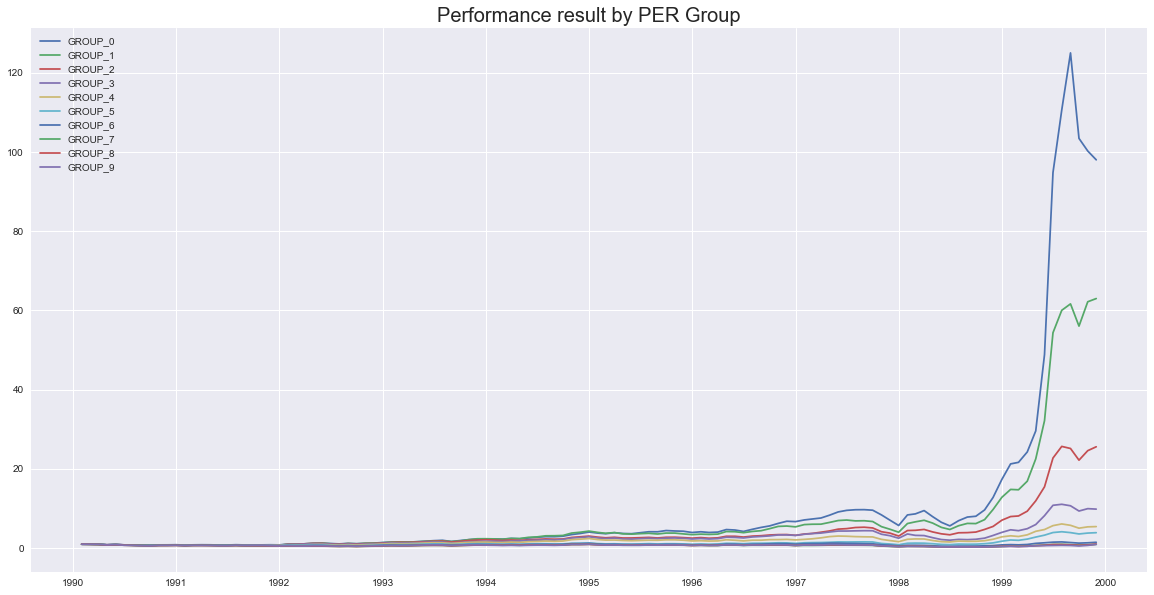

In [20]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[:119].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

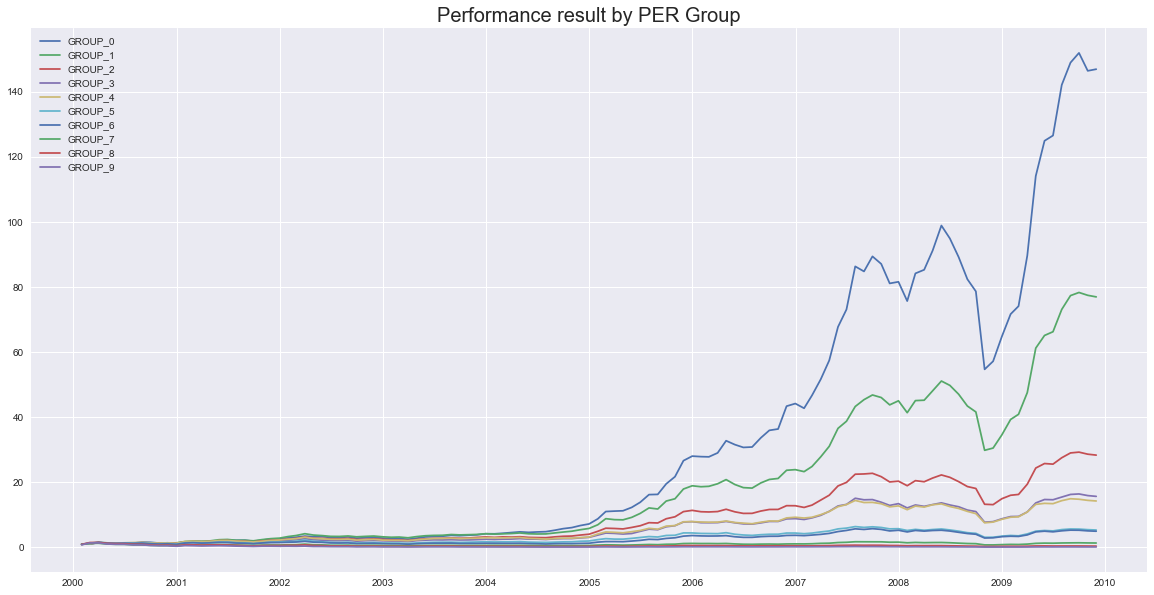

In [21]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[120:239].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

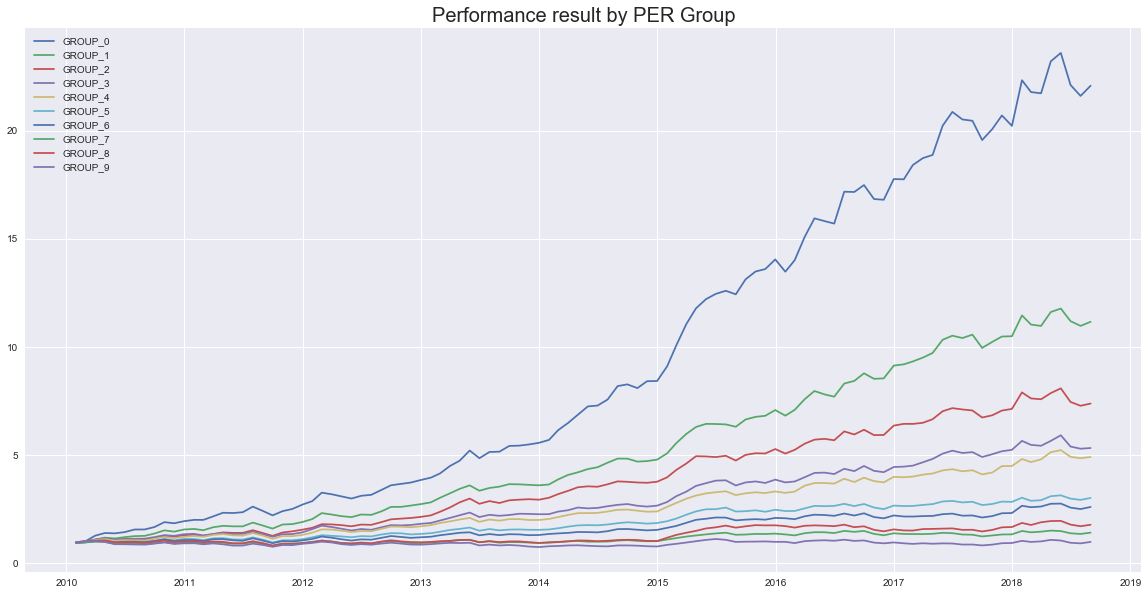

In [22]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[240:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

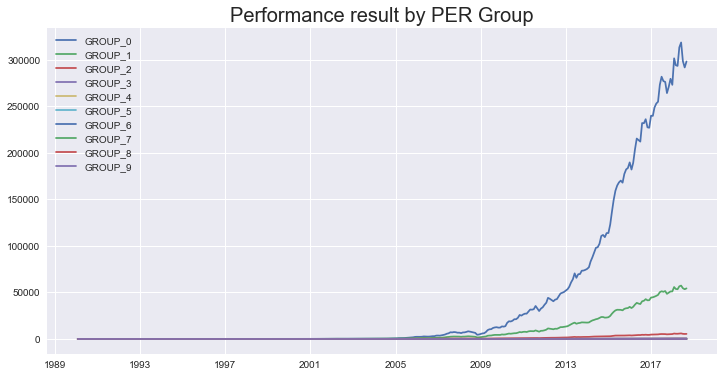

In [23]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

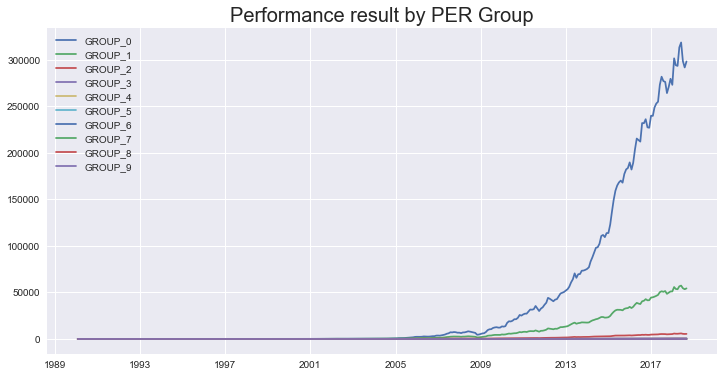

In [24]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Monthly return distribution by PER Group')

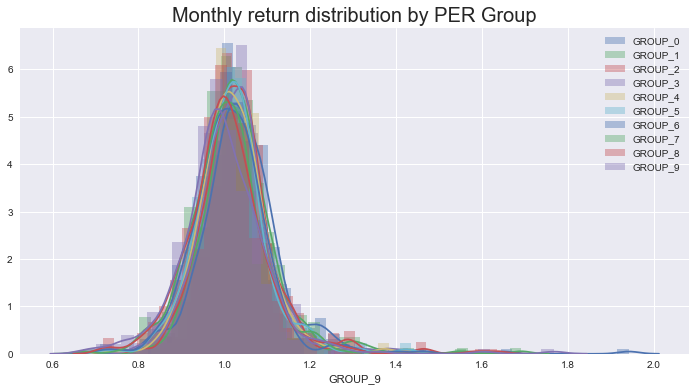

In [25]:
plt.figure(figsize = (12,6))

for column in result.columns:
    sns.distplot(result[column], label = column)

plt.legend(loc = 'best')
plt.title('Monthly return distribution by PER Group', fontsize = 20)

In [26]:
result.describe().apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
count,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000
mean,1.042,1.036,1.029,1.024,1.021,1.016,1.012,1.006,1.005,0.999
std,0.107,0.096,0.085,0.086,0.084,0.085,0.086,0.090,0.098,0.106
min,0.695,0.717,0.732,0.703,0.727,0.719,0.711,0.671,0.717,0.671
25%,0.989,0.984,0.981,0.971,0.974,0.965,0.961,0.957,0.955,0.948
50%,1.033,1.024,1.025,1.022,1.017,1.013,1.009,1.005,1.000,0.994
75%,1.085,1.072,1.068,1.061,1.064,1.055,1.059,1.051,1.049,1.053
max,1.941,1.691,1.470,1.427,1.434,1.433,1.465,1.563,1.635,1.767
